# Using word embeddings to predict sentiment of movie reviews with the IMDB dataset (Basic Model)


From: Deep Learning with Python (Starting at Listing 6.6)

Reproduced by: Guy Feldman
 

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
from keras.datasets import imdb
from keras import preprocessing

import numpy as np

Using TensorFlow backend.


In [3]:
# Number of words to consider as features
max_features = 10000
# cut texts after this number of words
max_len =  500

# The IMDB Dataset

- The features are vectors of word indices that represent a review
- The output variable, y, indicates whether a review was positive or negative.

The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training set. Rare words will be discarded. This allows us to work with vector data of manageable size.




In [4]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

Looking at the data we get indices of words and not the actual words

In [5]:
before_pad = np.array(x_train[0][-20:])
before_pad

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'#?#') for i in before_pad])
decoded_review

"story was so lovely because it was true and was someone's life after all that was shared with us all"

### The pad_sequences function takes the last max_len word indices from a review. If the review doesn't have max_len word indices, zeros are appended to the begining of the sequence so that all sequences have the same length.


In [7]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=max_len)

In [8]:
after_pad= x_train[0][-500:]
after_pad

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
before_pad

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

# Embedding Layer from Keras

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

# Basic Model (regression on the words)

To build this model, we:
1. add an embedding layer that will take the input vectors representing sentences (that live in $\mathbb{N}^{\text{max_len}}$) and embed each of the words in $\mathbb{R}^{32}$; 
2. flatten the tensor so that each row corresponds to a "sentence" with each word being represented by its embedded value.
3. Feed the sentence into a sigmoid layer for classification.

In [11]:
output_dim = 32
model = Sequential()
model.add(Embedding(max_features,output_dim,input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s - loss: 0.6041 - acc: 0.6878 - val_loss: 0.4462 - val_acc: 0.8136
Epoch 2/10
20000/20000 [==============================] - 0s - loss: 0.3190 - acc: 0.8828 - val_loss: 0.3011 - val_acc: 0.8800
Epoch 3/10
20000/20000 [==============================] - 0s - loss: 0.2178 - acc: 0.9207 - val_loss: 0.2772 - val_acc: 0.8880
Epoch 4/10
20000/20000 [==============================] - 0s - loss: 0.1668 - acc: 0.9415 - val_loss: 0.2660 - val_acc: 0.8908
Epoch 5/10
20000/20000 [==============================] - 0s - loss: 0.1278 - acc: 0.9583 - val_loss: 0.2689 - val_acc: 0.8898
Epoch 6/10
20000/20000 [==============================] - 0s - loss: 0.0982 - acc: 0.9706 - val_loss: 0.3006 - val_acc: 0.8814
Epoch 7/10
20000/20000 [==============================] - 0s - loss: 0.0741 - acc: 0.9796 - val_loss: 0.2968 - val_acc: 0.8896
Epoch 8/10
20000/20000 [==============================] - 0s -

# Result
1. We obtain an approximate accuracy of 0.88, which is not bad.

## Model Limitation
Since we simply flatten the words and feed them into a classifier, we are not taking into account the order of the words. (e.g. it would likely treat both "this movie is shit" and "this movie is the shit" as being negative "reviews"). It would be much better if we could add a recurrent layer to capture sequences of words.

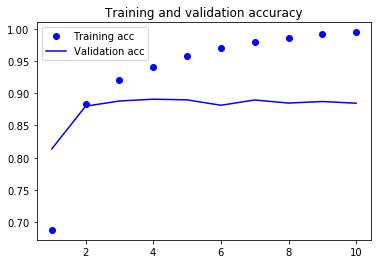

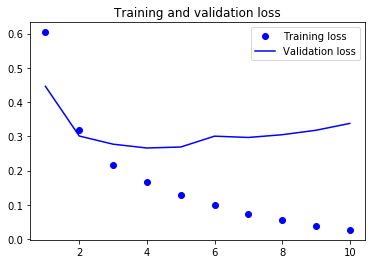

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()